In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
df.drop("timestamp", axis=1)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [5]:
df['rating'].isnull().values.any()
#checking if we need to do any other preprocessing
#no, there are no null values

False

In [6]:
df.dtypes
#so we see that reviews is an object

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object

In [7]:
#PCA puts everything on the same scale: each axis has the same change when we move around on a graph

In [8]:
#3 items to users that they have not yet rated, but that your system believes that they will rate highly

In [9]:
#1. pivot table
table = df.pivot_table(index='user_id', values='rating', columns='item_id', aggfunc='mean')
#pivot() doesnt work with duplicate values bc it doesnt know how to aggregate multiple values
#pivot_table() 

In [10]:
table

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
binary_matrix = table.copy()

In [12]:
#make binary matrix of rated or not (only recommend what they haven't rated)
#with help from Jade on slack
unrated = binary_matrix.isnull()
thing = binary_matrix[:] == 0
binary_matrix[thing] = 0
binary_matrix[unrated] = 1
final = binary_matrix[:] != 1
binary_matrix[final] = 0
binary_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
940,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
941,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
#2. take care of NaNs
table = table.fillna(3)
table

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
940,3.0,3.0,3.0,2.0,3.0,3.0,4.0,5.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
941,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [14]:
#mean center
nptable = table.to_numpy()

mean_vec = np.mean(nptable, axis=0)

table_std = nptable.copy()

for i in range(nptable.shape[1]):
    table_std[:,i] = (nptable[:,i] - mean_vec[i]*np.ones(nptable.shape[0])) #take each column and take mean
table_std

array([[-4.20550847e-01, -2.86016949e-02, -3.17796610e-03, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00],
       [ 1.57944915e+00, -2.86016949e-02,  9.96822034e-01, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00],
       [ 5.79449153e-01, -2.86016949e-02, -3.17796610e-03, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.57944915e+00, -2.86016949e-02, -3.17796610e-03, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00],
       [-4.20550847e-01, -2.86016949e-02, -3.17796610e-03, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00],
       [-4.20550847e-01,  1.97139831e+00, -3.17796610e-03, ...,
         1.05932203e-03,  0.00000000e+00,  0.00000000e+00]])

In [19]:
#do PCA (project to lower then back up to higher)
from sklearn.decomposition import PCA

#pca function
pca = PCA(n_components=94) #max: 944 significant components in this data
#fit transform
#principalComponents = pca.fit_transform(table_std)

#fit
principalComponents = pca.fit(table_std)
#then transform
transform = pca.transform(table_std)

#pca function that makes it original dimensions again (reverse transform)
#principalComponents.shape #originally the data is mean centered at 0,0
transform.shape
#its ok if some of these are negative bc that means my data is near 0,0

(944, 94)

In [16]:
np.sum(pca.explained_variance_ratio_)

0.589014431883909

<IPython.core.display.Javascript object>


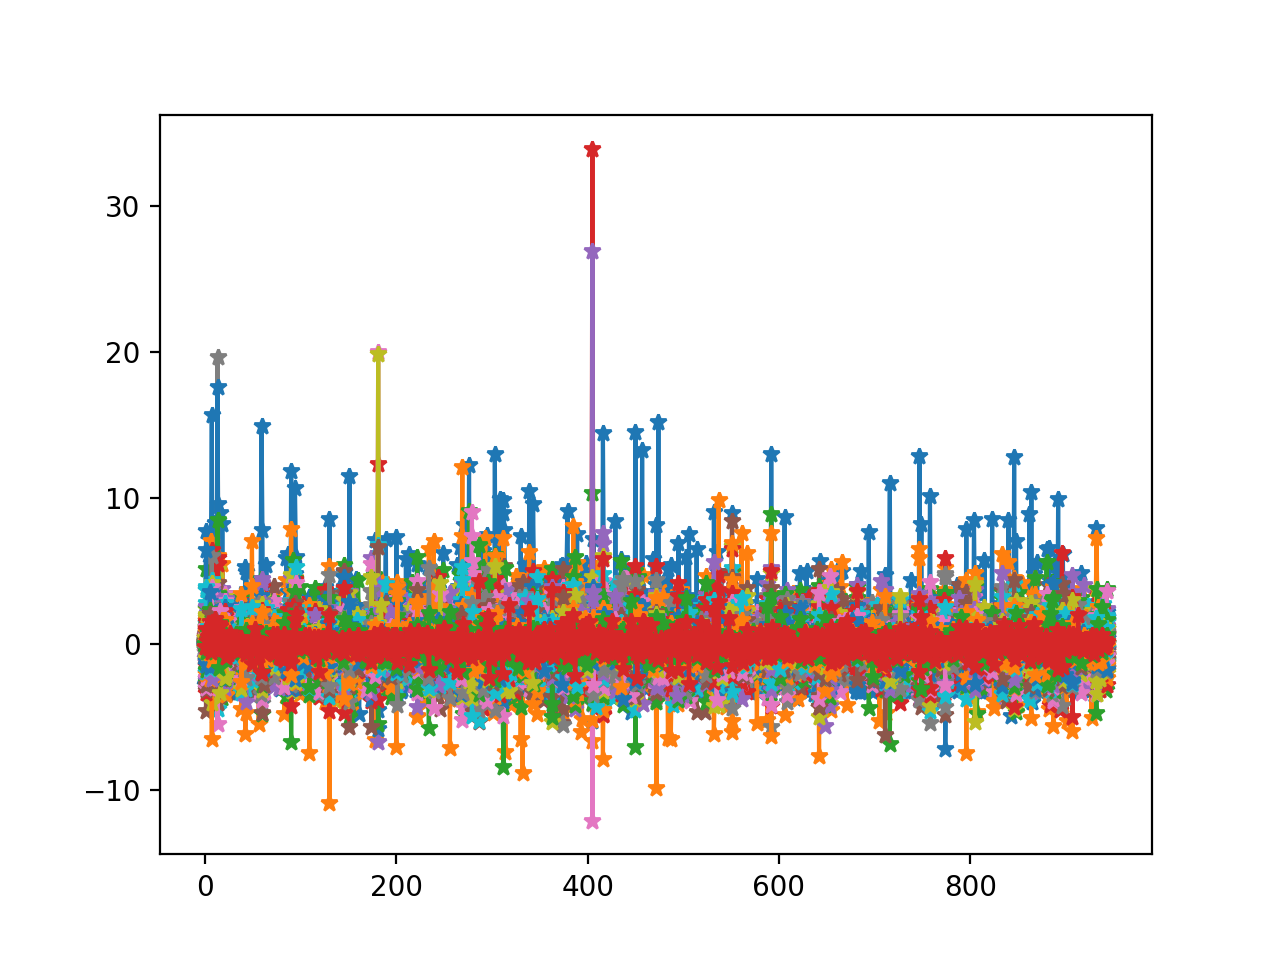

In [17]:
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.plot(transform, marker="*")